- ## ФИО: Восканян Саркис Араратович 
- ## Группа: БИВТ-21-1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, mean_absolute_error

## 1. Загрузка данных

In [10]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 2. Описание и постановка задачи

In [12]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Исходя из представленных колонок моджно сделать, что идеальной задачей для такого датасета является классификация - будем прогнозировать значение **'response'** в качестве целевой переменной.

## 3. Предобработка данных

### 3.1 Разбиение даннных на тренировочную и тестовую выборки

In [14]:
X = data.drop('Response', axis=1)
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2 Проверка пропусков в данных

In [15]:
print(X_train.isnull().sum())
print("\n \n")
print(X_test.isnull().sum())

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 19
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
dtype: int64

@@@@@@@@@@@@@@@@@@@@@@@@@

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 5
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWin

### 3.3 Трансформация данных

In [16]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## 4. Оформление данных в виде класса Dataset

In [17]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        X_row = self.X[idx].toarray()
        X_tensor = torch.tensor(X_row, dtype=torch.float32)
        return X_tensor, self.y[idx]

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## 5. Тренировка моделей

### 5.1 Однослойная нейронка

In [18]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

def train_model(model, criterion, optimizer, train_loader, test_loader, epochs=50):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        test_losses.append(test_loss / len(test_loader))
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

    return train_losses, test_losses

train_losses, test_losses = train_model(model, criterion, optimizer, train_loader, test_loader)


Epoch 1/50, Train Loss: 0.6357, Test Loss: 0.5889
Epoch 2/50, Train Loss: 0.5344, Test Loss: 0.5196
Epoch 3/50, Train Loss: 0.4713, Test Loss: 0.4739
Epoch 4/50, Train Loss: 0.4289, Test Loss: 0.4422
Epoch 5/50, Train Loss: 0.3988, Test Loss: 0.4200
Epoch 6/50, Train Loss: 0.3769, Test Loss: 0.4033
Epoch 7/50, Train Loss: 0.3604, Test Loss: 0.3912
Epoch 8/50, Train Loss: 0.3476, Test Loss: 0.3819
Epoch 9/50, Train Loss: 0.3374, Test Loss: 0.3746
Epoch 10/50, Train Loss: 0.3292, Test Loss: 0.3689
Epoch 11/50, Train Loss: 0.3223, Test Loss: 0.3642
Epoch 12/50, Train Loss: 0.3167, Test Loss: 0.3604
Epoch 13/50, Train Loss: 0.3119, Test Loss: 0.3574
Epoch 14/50, Train Loss: 0.3077, Test Loss: 0.3548
Epoch 15/50, Train Loss: 0.3041, Test Loss: 0.3525
Epoch 16/50, Train Loss: 0.3010, Test Loss: 0.3504
Epoch 17/50, Train Loss: 0.2982, Test Loss: 0.3488
Epoch 18/50, Train Loss: 0.2958, Test Loss: 0.3474
Epoch 19/50, Train Loss: 0.2936, Test Loss: 0.3460
Epoch 20/50, Train Loss: 0.2916, Test Lo

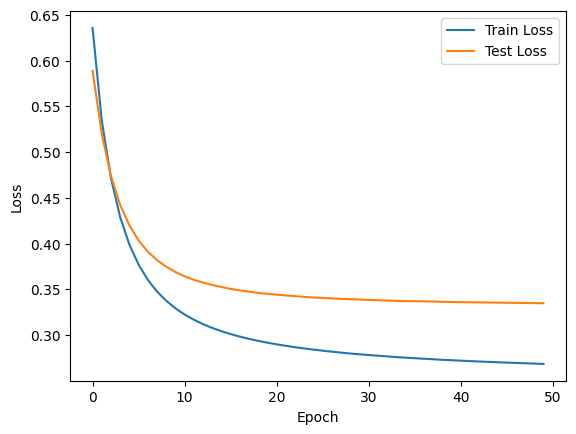

In [19]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
def evaluate_model(model, loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs).squeeze()
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.numpy())
            all_preds.extend(preds.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    mae = mean_absolute_error(all_labels, all_preds)
    return accuracy, mae

train_accuracy, train_mae = evaluate_model(model, train_loader)
test_accuracy, test_mae = evaluate_model(model, test_loader)

print(f'Train Accuracy: {train_accuracy:.4f}, Train MAE: {train_mae:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}, Test MAE: {test_mae:.4f}')

Train Accuracy: 0.8951, Train MAE: 0.1049
Test Accuracy: 0.8728, Test MAE: 0.1272


### 5.2 Нейросеть с 1 скрытым слоем. Оптимизатор Adam

In [21]:
class MediumNN(nn.Module):
    def __init__(self, input_dim):
        super(MediumNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

model = MediumNN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, test_losses = train_model(model, criterion, optimizer, train_loader, test_loader)

Epoch 1/50, Train Loss: 0.5273, Test Loss: 0.4414
Epoch 2/50, Train Loss: 0.3508, Test Loss: 0.3583
Epoch 3/50, Train Loss: 0.2818, Test Loss: 0.3343
Epoch 4/50, Train Loss: 0.2525, Test Loss: 0.3276
Epoch 5/50, Train Loss: 0.2320, Test Loss: 0.3214
Epoch 6/50, Train Loss: 0.2158, Test Loss: 0.3211
Epoch 7/50, Train Loss: 0.2018, Test Loss: 0.3186
Epoch 8/50, Train Loss: 0.1901, Test Loss: 0.3183
Epoch 9/50, Train Loss: 0.1769, Test Loss: 0.3197
Epoch 10/50, Train Loss: 0.1664, Test Loss: 0.3253
Epoch 11/50, Train Loss: 0.1540, Test Loss: 0.3198
Epoch 12/50, Train Loss: 0.1425, Test Loss: 0.3232
Epoch 13/50, Train Loss: 0.1303, Test Loss: 0.3300
Epoch 14/50, Train Loss: 0.1213, Test Loss: 0.3337
Epoch 15/50, Train Loss: 0.1135, Test Loss: 0.3376
Epoch 16/50, Train Loss: 0.1038, Test Loss: 0.3384
Epoch 17/50, Train Loss: 0.0974, Test Loss: 0.3460
Epoch 18/50, Train Loss: 0.0899, Test Loss: 0.3512
Epoch 19/50, Train Loss: 0.0840, Test Loss: 0.3624
Epoch 20/50, Train Loss: 0.0785, Test Lo

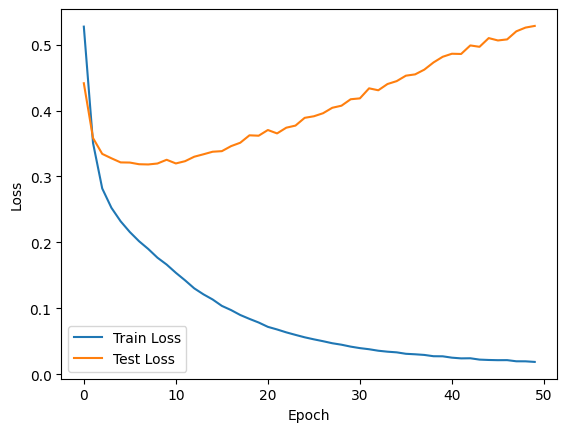

In [22]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
def evaluate_model(model, loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs).squeeze()
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.numpy())
            all_preds.extend(preds.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    mae = mean_absolute_error(all_labels, all_preds)
    return accuracy, mae

train_accuracy, train_mae = evaluate_model(model, train_loader)
test_accuracy, test_mae = evaluate_model(model, test_loader)

print(f'Train Accuracy: {train_accuracy:.4f}, Train MAE: {train_mae:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}, Test MAE: {test_mae:.4f}')

Train Accuracy: 0.9961, Train MAE: 0.0039
Test Accuracy: 0.8482, Test MAE: 0.1518


### 5.3 Нейросеть с 3+ скрытыми слоями. Оптимизатор Adam

In [24]:
class ComplexNN(nn.Module):
    def __init__(self, input_dim):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return torch.sigmoid(self.fc4(x))

model = ComplexNN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
train_losses, test_losses = train_model(model, criterion, optimizer, train_loader, test_loader)

Epoch 1/50, Train Loss: 0.5197, Test Loss: 0.3745
Epoch 2/50, Train Loss: 0.2803, Test Loss: 0.3292
Epoch 3/50, Train Loss: 0.2334, Test Loss: 0.3324
Epoch 4/50, Train Loss: 0.1973, Test Loss: 0.3479
Epoch 5/50, Train Loss: 0.1573, Test Loss: 0.3399
Epoch 6/50, Train Loss: 0.1189, Test Loss: 0.3872
Epoch 7/50, Train Loss: 0.0776, Test Loss: 0.4073
Epoch 8/50, Train Loss: 0.0595, Test Loss: 0.4421
Epoch 9/50, Train Loss: 0.0430, Test Loss: 0.4748
Epoch 10/50, Train Loss: 0.0313, Test Loss: 0.5206
Epoch 11/50, Train Loss: 0.0261, Test Loss: 0.5380
Epoch 12/50, Train Loss: 0.0272, Test Loss: 0.5595
Epoch 13/50, Train Loss: 0.0271, Test Loss: 0.5897
Epoch 14/50, Train Loss: 0.0294, Test Loss: 0.5867
Epoch 15/50, Train Loss: 0.0179, Test Loss: 0.6297
Epoch 16/50, Train Loss: 0.0174, Test Loss: 0.5871
Epoch 17/50, Train Loss: 0.0180, Test Loss: 0.6558
Epoch 18/50, Train Loss: 0.0172, Test Loss: 0.6020
Epoch 19/50, Train Loss: 0.0171, Test Loss: 0.6970
Epoch 20/50, Train Loss: 0.0158, Test Lo

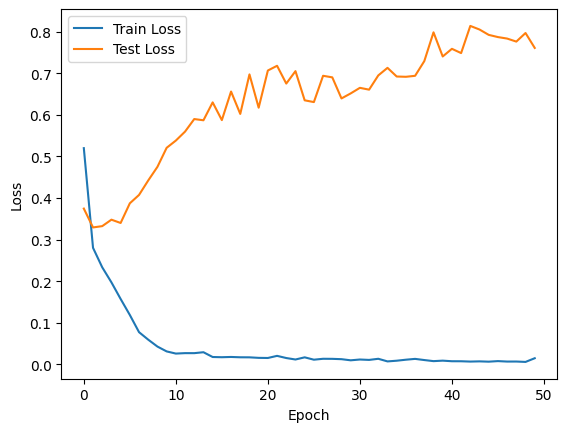

In [25]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
def evaluate_model(model, loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs).squeeze()
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.numpy())
            all_preds.extend(preds.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    mae = mean_absolute_error(all_labels, all_preds)
    return accuracy, mae

train_accuracy, train_mae = evaluate_model(model, train_loader)
test_accuracy, test_mae = evaluate_model(model, test_loader)

print(f'Train Accuracy: {train_accuracy:.4f}, Train MAE: {train_mae:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}, Test MAE: {test_mae:.4f}')

Train Accuracy: 0.9978, Train MAE: 0.0022
Test Accuracy: 0.8393, Test MAE: 0.1607
